# ORB

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ORB Özelliklerini Çıkartan Fonksiyon

In [2]:
def extract_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Dosya açılamadı - {image_path}")
        return None, None

    # Resim gri tonlamaya dönüştürülüyor
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # ORB oluşturma
    orb = cv2.ORB_create()

    # Keypoints ve descriptors çıkarma
    keypoints, descriptors = orb.detectAndCompute(img_gray, None)

    if descriptors is None:
        print(f"Özellikler çıkartılamadı - {image_path}")
        return None, None
    
    # descriptors ın tipini değistirme (normalizasyon için)
    descriptors = descriptors.astype(np.float32)
    
    # descriptors normalize ediliyor (0 ile 1 arasında ölçeklenir)
    descriptors = cv2.normalize(descriptors, None, 0, 1, cv2.NORM_MINMAX)

    return keypoints, descriptors

# ORB Özelliklerini Karşılaştıran Fonksiyon

In [3]:
def match_features(query_features, reference_features, threshold=0.60):

    # FLANN oluşturuluyor (eşleştirme için)
    flann = cv2.FlannBasedMatcher()

    # İyi eşleşmelerin sayısını bulmak için FLANN kullanılır ve eşleştirme sonuçları matches değişkenine atanır
    matches = flann.knnMatch(query_features[1], reference_features[1], k=2)

    # İyi eşleşmelerin listesi oluşturuluyor
    good_matches = []
    for m, n in matches:
        if m.distance < threshold * n.distance: # Eğer birinci noktanın uzaklığı ikinci noktanın threshold katından küçükse bu eşleşme iyi olarak kabul edilir ve listeye eklenir
            good_matches.append(m)

    return len(good_matches)

# Para Tahmini Yapan Fonksiyon

In [4]:
def predict_currency(test_directory, reference_directory, threshold=0.60):

    # Tahmin için gerekli sözlük oluşturuluyor
    reference_data = {}

    for currency_folder in os.listdir(reference_directory):
        currency_path = os.path.join(reference_directory, currency_folder)
        reference_data[currency_folder] = []

        # Paraların özellikleri çıkartılıp sözlüğe ekleniyor
        for file_name in os.listdir(currency_path):
            file_path = os.path.join(currency_path, file_name)
            keypoints, descriptors = extract_features(file_path)
            if keypoints is not None and descriptors is not None:
                reference_data[currency_folder].append((keypoints, descriptors))

    # Test dizinindeki her bir görüntü için tahmin yapma
    for test_image_name in os.listdir(test_directory):
        test_image_path = os.path.join(test_directory, test_image_name)
        test_keypoints, test_descriptors = extract_features(test_image_path)

        if test_keypoints is not None and test_descriptors is not None:
            best_match = None
            best_match_count = 0

            # Sözlüğün içindeki özellikler ile test özellikleri karşılaştırılıyor
            for currency, reference_features_list in reference_data.items():
                match_count = 0
                for reference_keypoints, reference_descriptors in reference_features_list:
                    match_count += match_features((test_keypoints, test_descriptors), (reference_keypoints, reference_descriptors), threshold)

                # Daha iyi bir eşleşme bulunursa değiştiriliyor
                if match_count > best_match_count:
                    best_match_count = match_count
                    best_match = currency

                print(f"{currency}: {match_count} eşleşme")

            print(f"Test Görüntüsü: {test_image_name} - Tahmini Para Birimi: {best_match} - En İyi Eşleşme Sayısı: {best_match_count}")
            img = cv2.imread(test_image_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
            plt.title(f"Tahmin: {best_match}")
            plt.axis("off")
            plt.show()

100TL: 38 eşleşme
10TL: 3 eşleşme
200TL: 5 eşleşme
20TL: 7 eşleşme
50TL: 4 eşleşme
5TL: 3 eşleşme
Test Görüntüsü: 100TL_ARKA.jpg - Tahmini Para Birimi: 100TL - En İyi Eşleşme Sayısı: 38


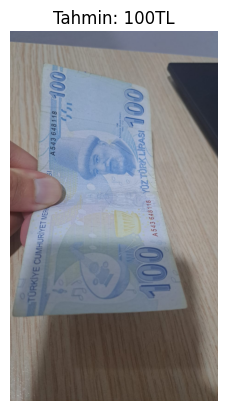

100TL: 35 eşleşme
10TL: 5 eşleşme
200TL: 5 eşleşme
20TL: 15 eşleşme
50TL: 11 eşleşme
5TL: 7 eşleşme
Test Görüntüsü: 100TL_ON.jpg - Tahmini Para Birimi: 100TL - En İyi Eşleşme Sayısı: 35


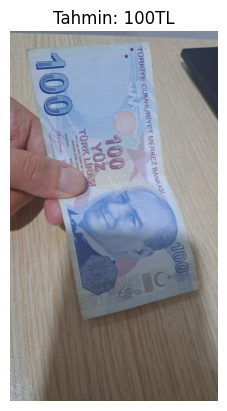

100TL: 3 eşleşme
10TL: 6 eşleşme
200TL: 5 eşleşme
20TL: 1 eşleşme
50TL: 5 eşleşme
5TL: 7 eşleşme
Test Görüntüsü: 10TL_ARKA.jpg - Tahmini Para Birimi: 5TL - En İyi Eşleşme Sayısı: 7


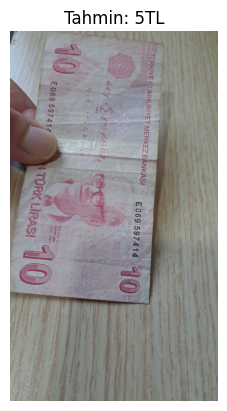

100TL: 4 eşleşme
10TL: 16 eşleşme
200TL: 4 eşleşme
20TL: 1 eşleşme
50TL: 7 eşleşme
5TL: 6 eşleşme
Test Görüntüsü: 10TL_ON.jpg - Tahmini Para Birimi: 10TL - En İyi Eşleşme Sayısı: 16


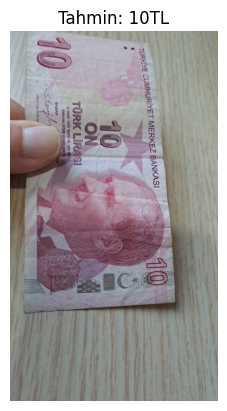

100TL: 12 eşleşme
10TL: 5 eşleşme
200TL: 66 eşleşme
20TL: 5 eşleşme
50TL: 13 eşleşme
5TL: 9 eşleşme
Test Görüntüsü: 200TL_ARKA.jpg - Tahmini Para Birimi: 200TL - En İyi Eşleşme Sayısı: 66


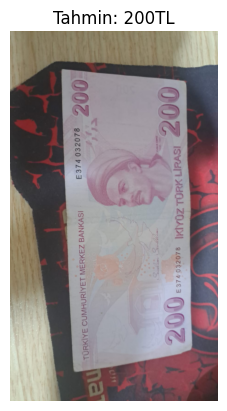

100TL: 8 eşleşme
10TL: 12 eşleşme
200TL: 24 eşleşme
20TL: 12 eşleşme
50TL: 15 eşleşme
5TL: 6 eşleşme
Test Görüntüsü: 200TL_ON.jpg - Tahmini Para Birimi: 200TL - En İyi Eşleşme Sayısı: 24


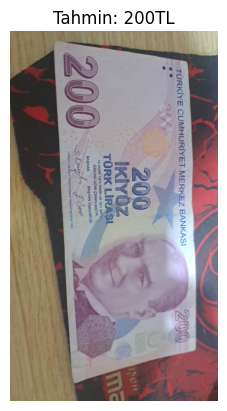

100TL: 6 eşleşme
10TL: 3 eşleşme
200TL: 3 eşleşme
20TL: 7 eşleşme
50TL: 4 eşleşme
5TL: 1 eşleşme
Test Görüntüsü: 20TL_ARKA.jpg - Tahmini Para Birimi: 20TL - En İyi Eşleşme Sayısı: 7


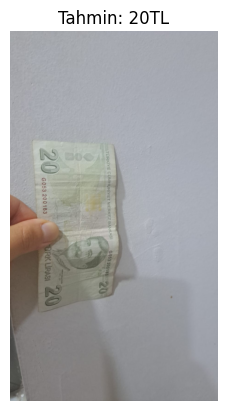

100TL: 4 eşleşme
10TL: 5 eşleşme
200TL: 6 eşleşme
20TL: 22 eşleşme
50TL: 11 eşleşme
5TL: 8 eşleşme
Test Görüntüsü: 20TL_ON.jpg - Tahmini Para Birimi: 20TL - En İyi Eşleşme Sayısı: 22


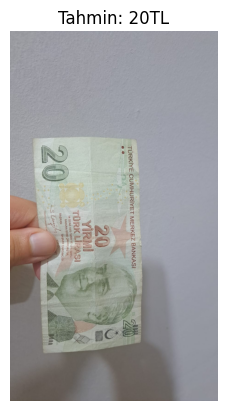

100TL: 8 eşleşme
10TL: 5 eşleşme
200TL: 4 eşleşme
20TL: 4 eşleşme
50TL: 39 eşleşme
5TL: 10 eşleşme
Test Görüntüsü: 50TL_ARKA.jpg - Tahmini Para Birimi: 50TL - En İyi Eşleşme Sayısı: 39


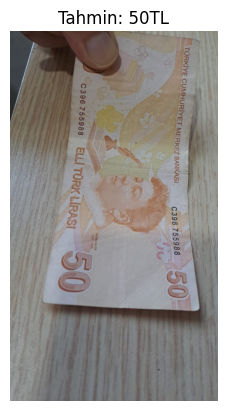

100TL: 11 eşleşme
10TL: 5 eşleşme
200TL: 6 eşleşme
20TL: 8 eşleşme
50TL: 25 eşleşme
5TL: 10 eşleşme
Test Görüntüsü: 50TL_ON.jpg - Tahmini Para Birimi: 50TL - En İyi Eşleşme Sayısı: 25


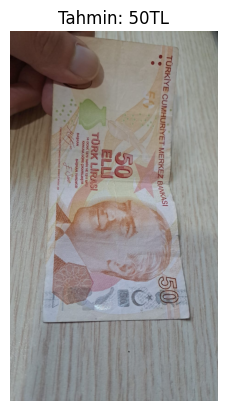

100TL: 2 eşleşme
10TL: 10 eşleşme
200TL: 3 eşleşme
20TL: 3 eşleşme
50TL: 4 eşleşme
5TL: 14 eşleşme
Test Görüntüsü: 5TL_ARKA.jpg - Tahmini Para Birimi: 5TL - En İyi Eşleşme Sayısı: 14


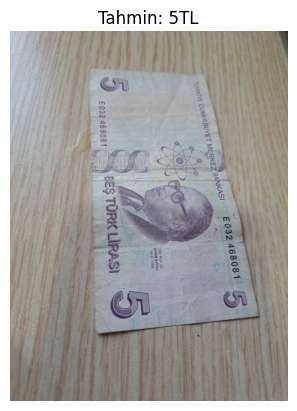

100TL: 2 eşleşme
10TL: 9 eşleşme
200TL: 0 eşleşme
20TL: 1 eşleşme
50TL: 8 eşleşme
5TL: 10 eşleşme
Test Görüntüsü: 5TL_ON.jpg - Tahmini Para Birimi: 5TL - En İyi Eşleşme Sayısı: 10


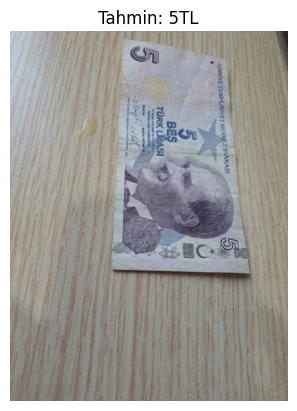

In [5]:
test_directory = 'test'
reference_directory = 'turkish_banknote_images'

predict_currency(test_directory, reference_directory, threshold=0.60)